In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [2]:
data=pd.read_csv("TSLA.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
data["Date"] = pd.to_datetime(data.Date)

In [6]:
data.shape

(2416, 7)

In [8]:
 data.drop("Adj Close",axis=1,inplace = True )

In [9]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [11]:
data.tail

<bound method NDFrame.tail of            Date        Open        High         Low       Close    Volume
0    2010-06-29   19.000000   25.000000   17.540001   23.889999  18766300
1    2010-06-30   25.790001   30.420000   23.299999   23.830000  17187100
2    2010-07-01   25.000000   25.920000   20.270000   21.959999   8218800
3    2010-07-02   23.000000   23.100000   18.709999   19.200001   5139800
4    2010-07-06   20.000000   20.000000   15.830000   16.110001   6866900
...         ...         ...         ...         ...         ...       ...
2411 2020-01-28  568.489990  576.809998  558.080017  566.900024  11788500
2412 2020-01-29  575.690002  589.799988  567.429993  580.989990  17801500
2413 2020-01-30  632.419983  650.880005  618.000000  640.809998  29005700
2414 2020-01-31  640.000000  653.000000  632.520020  650.570007  15719300
2415 2020-02-03  673.690002  786.140015  673.520020  780.000000  47065000

[2416 rows x 6 columns]>

In [12]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [14]:
data.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2416 non-null   datetime64[ns]
 1   Open    2416 non-null   float64       
 2   High    2416 non-null   float64       
 3   Low     2416 non-null   float64       
 4   Close   2416 non-null   float64       
 5   Volume  2416 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 113.4 KB


In [16]:
data.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


In [17]:
print(len(data))

2416


<AxesSubplot:>

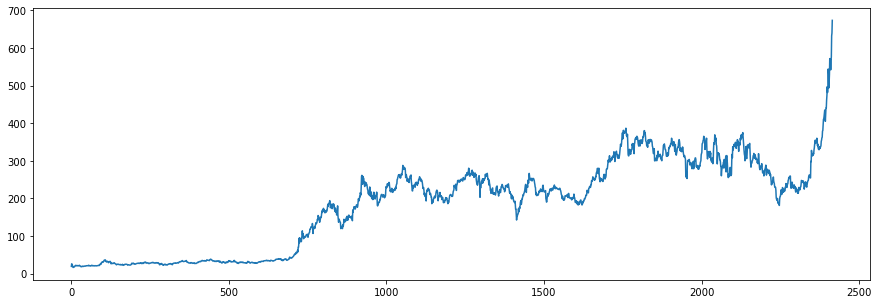

In [21]:
data['Open'].plot(figsize=(15,5))

In [22]:
x = data[['Open','High','Low','Volume']]
y = data['Close']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, random_state = 0)

In [28]:
x_train.shape

(1812, 4)

In [29]:
x_test.shape

(604, 4)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor = LinearRegression()

In [31]:
regressor.fit(x_train,y_train)

LinearRegression()

In [32]:
regressor.coef_

array([-6.39634305e-01,  9.11543017e-01,  7.26604894e-01, -1.55475449e-08])

In [33]:
predict = regressor.predict(x_test)

In [35]:
print(x_test)

            Open        High         Low    Volume
966   207.080002  214.020004  205.690002   5439900
557    27.900000   28.580000   27.799999   1145200
148    24.879999   24.879999   23.750000   1048400
1917  343.309998  348.619995  314.600006  10314600
1585  200.500000  200.899994  197.050003   2494600
...          ...         ...         ...       ...
1636  214.880005  222.250000  214.419998   5915700
1948  307.339996  307.589996  291.359985   8375200
2348  297.720001  330.000000  296.109985  30006100
1190  198.500000  200.500000  197.470001   2631600
359    32.490002   33.070000   31.629999    591100

[604 rows x 4 columns]


In [36]:
predict.shape

(604,)

In [37]:
dframe=pd.DataFrame(y_test,predict)

In [39]:
df=pd.DataFrame({"Actual price":y_test,"predict price":predict})

In [40]:
df

,Actual price,predict price
966,207.729996,211.941303
557,28.280001,28.325464
148,24.010000,23.943206
1917,315.230011,326.556359
1585,200.240005,197.958571
...,...,...
1636,219.529999,220.790009
1948,304.179993,295.307237
2348,328.130005,325.003264
1190,199.630005,199.176271


In [41]:
df.head(7)

,Actual price,predict price
966,207.729996,211.941303
557,28.280001,28.325464
148,24.010000,23.943206
1917,315.230011,326.556359
1585,200.240005,197.958571
985,210.240005,209.816491
215,26.440001,26.548544


In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [43]:
regressor.score(x_test,y_test)

0.9996847995137271

In [44]:
import math

In [45]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predict))

Mean Absolute Error: 1.395890589507113


In [47]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predict)))

Root Mean Squared Error: 2.1026781249550646


In [50]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predict))

Mean Squared Error: 4.421255297164546


In [48]:
graph=df.head(7)

<AxesSubplot:>

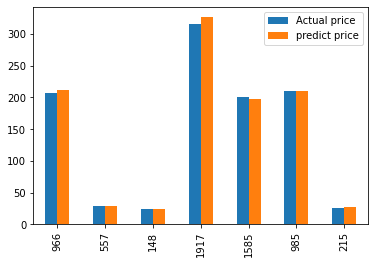

In [49]:
graph.plot(kind='bar')

In [51]:
x_train.head(7)

,Open,High,Low,Volume
369,30.570000,30.930000,28.910000,994100
309,24.950001,25.809999,23.820000,1157400
1070,244.000000,248.639999,241.380005,4852700
1807,353.549988,358.440002,352.820007,4072800
1819,380.000000,382.390015,373.570007,6451900
1732,317.589996,320.059998,315.140015,4152500
1203,209.850006,211.649994,209.000000,4067700


5 Glimpses of output

In [54]:
predict=x_train.iloc[369]

In [55]:
predict

Open      1.938700e+02
High      1.941200e+02
Low       1.870400e+02
Volume    4.503200e+06
Name: 1147, dtype: float64

In [57]:
stockmarket1= np.array([predict])

In [58]:
stockmarket1

array([[1.93869995e+02, 1.94119995e+02, 1.87039993e+02, 4.50320000e+06]])

In [60]:
regressor.predict(stockmarket1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([188.71453824])

In [61]:
predict=x_train.iloc[309]

In [62]:
predict

Open      1.895500e+02
High      1.986800e+02
Low       1.895100e+02
Volume    4.153000e+06
Name: 1148, dtype: float64

In [63]:
stockmarket2= np.array([predict])

In [64]:
stockmarket2

array([[1.89550003e+02, 1.98679993e+02, 1.89509995e+02, 4.15300000e+06]])

In [65]:
regressor.predict(stockmarket2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([197.43454795])

In [66]:
predict=x_train.iloc[1070]

In [67]:
predict

Open          27.799999
High          27.799999
Low           27.450001
Volume    577700.000000
Name: 588, dtype: float64

In [68]:
stockmarket3=np.array([predict])

In [69]:
stockmarket3

array([[2.7799999e+01, 2.7799999e+01, 2.7450001e+01, 5.7770000e+05]])

In [70]:
predict=x_train.iloc[1807]

In [71]:
predict

Open      2.389000e+02
High      2.514200e+02
Low       2.385800e+02
Volume    9.249300e+06
Name: 1033, dtype: float64

In [72]:
stockmarket4=np.array([predict])

In [73]:
stockmarket4

array([[2.38899994e+02, 2.51419998e+02, 2.38580002e+02, 9.24930000e+06]])

In [76]:
predict=x_train.iloc[1732]

In [77]:
predict

Open      2.082200e+02
High      2.099900e+02
Low       2.065000e+02
Volume    3.111100e+06
Name: 1634, dtype: float64

In [78]:
stockmarket5=np.array([predict])

In [79]:
stockmarket5

array([[2.08220001e+02, 2.09990005e+02, 2.06500000e+02, 3.11110000e+06]])